### ReAct Agent with LangGraph
#### Plan a trip to a destination based on preferences

In [ ]:
# If you don't use requirements.txt, run the following command:

!pip install ipython langgraph langchain-core langchain-openai python-dotenv langchain-community --quiet

In [10]:
# Environment Setup:
# 1. Create a .env file in your project root if it doesn't exist
# 2. Add your OpenAI API key: OPENAI_API_KEY='your-api-key-here'
#    Example: OPENAI_API_KEY='sk-...'
# Note: Make sure to add .env to your .gitignore file

# Standard Libraries
from dotenv import load_dotenv
# IPython
from IPython.display import display, Image, Markdown
# Langchain
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.tools import TavilySearchResults
from langgraph.prebuilt import create_react_agent
from langchain.agents import AgentExecutor

In [2]:
_ = load_dotenv()

In [3]:
model = ChatOpenAI(model_name="gpt-4o")

In [5]:
tavily_search = TavilySearchResults(max_results=5)

In [6]:
from langchain_core.tools import tool
from datetime import datetime as dt

@tool
def get_current_date():
    """Returns the current date and time. Use thist ool first ofr any date and time related queries."""
    return f"The current date is: {dt.now().strftime('%Y-%m-%d %H:%M:%S')}."

In [7]:
# List of the tools for the agent
tools = [tavily_search, get_current_date]

In [8]:
graph = create_react_agent(model, tools)

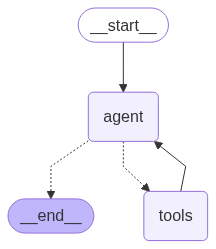

In [16]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
# Helper function to render Markdown
def render_markdown(markdown_str):
    display(Markdown(markdown_str))

In [17]:
# Helper function to stream the agent's response
def process_stream(stream):
    for chunk in stream:
        message = chunk["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
    return message

In [18]:
# Helper function to process query
def process_query(query):
    inputs = {"messages": [("user", query)]}
    message = process_stream(graph.stream(inputs, stream_mode="values"))
    render_markdown(f"## Answer:\n{message.content}")

In [19]:
process_query("what is the current date")

================================ Human Message =================================

what is the current date
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_mBDrR20lcVbnCV4dQ6DfKByc)
 Call ID: call_mBDrR20lcVbnCV4dQ6DfKByc
  Args:
================================= Tool Message =================================
Name: get_current_date

The current date is: 2025-08-31 19:07:49.
================================== Ai Message ==================================

Today's date is August 31, 2025.


## Answer:
Today's date is August 31, 2025.

In [20]:
process_query("who won the latest F1 race singapore")

#GPT-4o's training data only goes up to October 2023. The Singapore F1 race for 2024 or 2025 would be after its training period, so it can't know the winner from its training data.

================================ Human Message =================================

who won the latest F1 race singapore
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_O0FaZUXoAZ6IxARb5rmxmGSk)
 Call ID: call_O0FaZUXoAZ6IxARb5rmxmGSk
  Args:
  tavily_search_results_json (call_3BuIHTpdFnfqZPY5YMiNAPtB)
 Call ID: call_3BuIHTpdFnfqZPY5YMiNAPtB
  Args:
    query: latest F1 race Singapore winner
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Singapore Grand Prix", "url": "https://en.wikipedia.org/wiki/Singapore_Grand_Prix", "content": "F1's new-generation turbo-charged, hybrid-powered cars brought a new look to the track, ending the reign of the 2.4-litre power unit, but a controversial ban on radio communications dominated pre-race proceedings. Mercedes's Lewis Hamilton sailed to his seventh win of the year, becoming Singapore's third multiple

## Answer:
The latest F1 race in Singapore was won by Lando Norris of McLaren Mercedes.

In [21]:
process_query("what is the weather tomorrow in Chennai")

================================ Human Message =================================

what is the weather tomorrow in Chennai
================================== Ai Message ==================================
Tool Calls:
  get_current_date (call_1xQuTzIHnVRHdYgjcJERkHpF)
 Call ID: call_1xQuTzIHnVRHdYgjcJERkHpF
  Args:
  tavily_search_results_json (call_NSF1HifCX7CVZsqkfJKq0hUt)
 Call ID: call_NSF1HifCX7CVZsqkfJKq0hUt
  Args:
    query: Chennai weather forecast October 23 2023
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Weather in Chennai in October 2023 (State of Tamil Nādu)", "url": "https://world-weather.info/forecast/india/chennai_1/october-2023/", "content": "Weather\n Archive\n Weather Widget\n\n World\n India\n State of Tamil Nādu\n Weather in Chennai\n\n# Weather in Chennai in October 2023\n\nChennai Weather Forecast for October 2023 is based on statistical data.\n\nJanFebMarAprMayJunJulAugSepOctNovDec\

## Answer:
The current year is 2025, so the exact weather for tomorrow's date in 2023 might not be available from current sources since it requires past data. However, for historical climatological forecasts in this period, Chennai tends to have warm temperatures during October, with moderate humidity and a chance of rain. Typically, October temperatures in Chennai range from about 79°F (26°C) at night to 86°F (30°C) during the day. Expect possible rainfall as it's the monsoon season.

For any specific weather details or additional data, please check a current forecast source like a weather website or application closer to the date for the most accurate information.

In [22]:
process_query("what is the capital of Malaysia")

================================ Human Message =================================

what is the capital of Malaysia
================================== Ai Message ==================================

The capital of Malaysia is Kuala Lumpur.


## Answer:
The capital of Malaysia is Kuala Lumpur.